Loading the digits dataset...
Dataset loaded! We have 1797 images of handwritten digits.

Displaying some example digits (0-9):


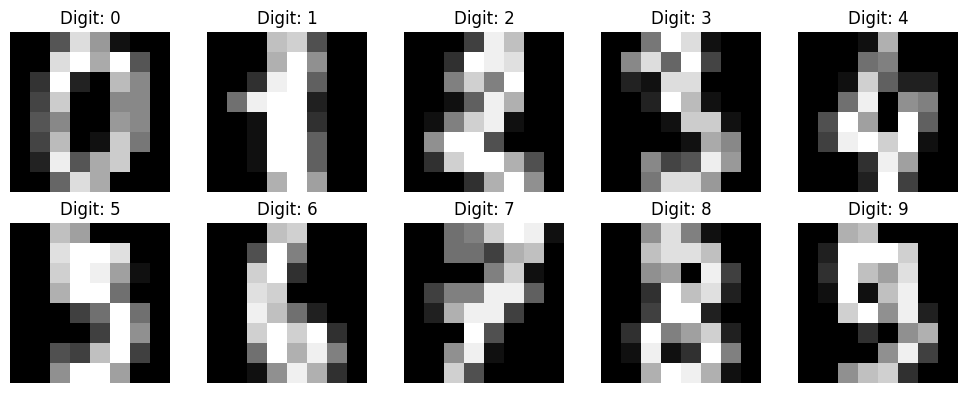

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Step 1: Load the handwritten digits dataset
print("Loading the digits dataset...")
digits = datasets.load_digits()
print(f"Dataset loaded! We have {len(digits.images)} images of handwritten digits.")

# Display a few sample images
print("\nDisplaying some example digits (0-9):")
plt.figure(figsize=(10, 4))  # Set figure size
for i in range(10):  # Show the first 10 images
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit: {digits.target[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Step 2: Prepare the data for training
print("\nPreparing the data...")
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))  # Flatten 8x8 images into 64-pixel arrays
y = digits.target  # Labels (0-9)


Preparing the data...


In [7]:
# Step 3: Split data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training size: {len(X_train)} images, Testing size: {len(X_test)} images")

Splitting data into training and testing sets...
Training size: 1437 images, Testing size: 360 images


In [8]:
# Step 4: Create and train the SVM model
print("\nCreating and training the SVM model...")
model = svm.SVC(gamma=0.001)
model.fit(X_train, y_train)
print("Model training complete!")


Creating and training the SVM model...
Model training complete!


In [9]:
# Step 5: Make predictions on the test set
print("\nTesting the model...")
y_pred = model.predict(X_test)



Testing the model...


In [10]:
# Step 6: Evaluate model performance
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print(f"\nModel Accuracy: {accuracy:.2f}%")
print("\nDetailed performance report:")
print(metrics.classification_report(y_test, y_pred))


Model Accuracy: 98.89%

Detailed performance report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




Displaying some example predictions:


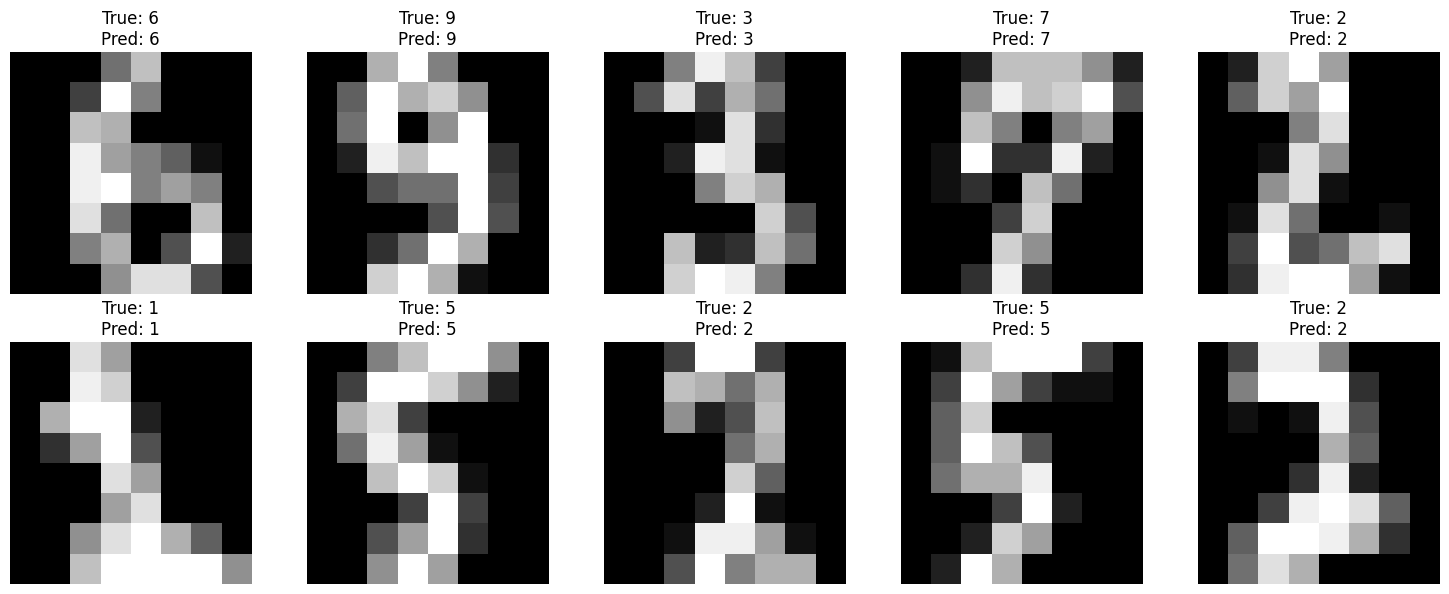

In [11]:
# Step 7: Visualize some predictions
print("\nDisplaying some example predictions:")
plt.figure(figsize=(15, 6))
for i in range(10):  # Show 10 test images with predictions
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Testing the model on one sample of each digit (0-9):


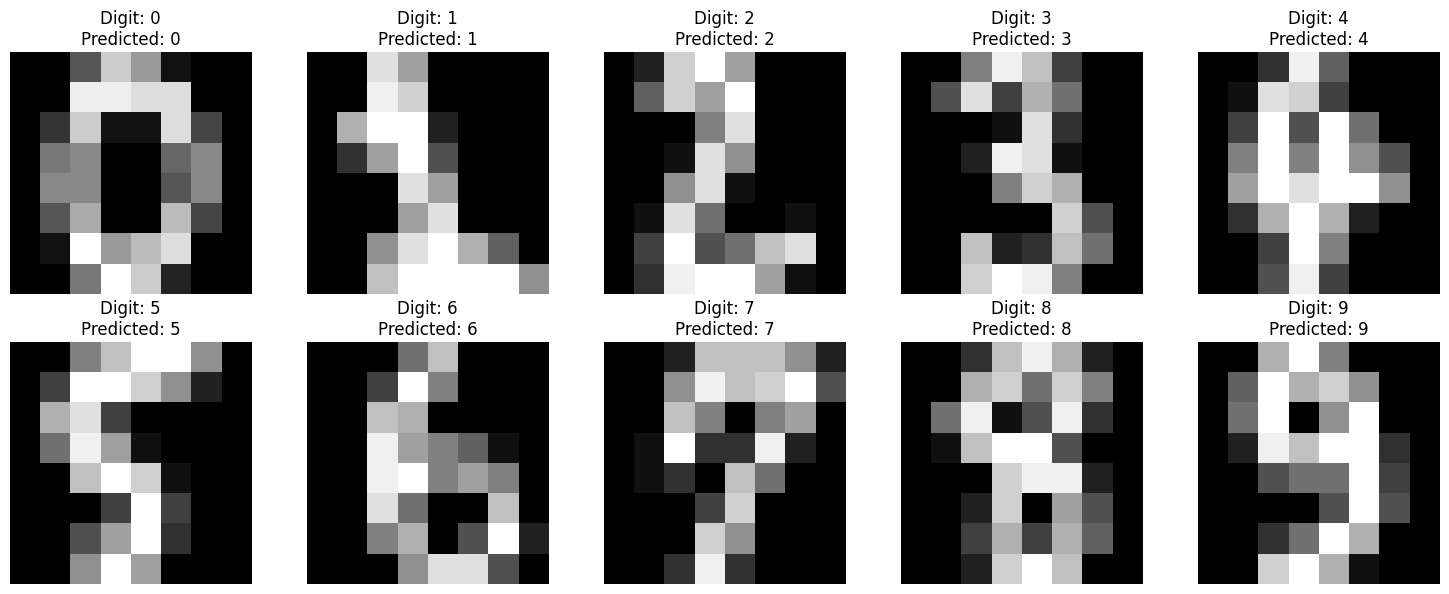

In [12]:
# Step 8: Predict specific digits from the test set
print("\nTesting the model on one sample of each digit (0-9):")

# Find one example of each digit in the test set
sample_indices = {}
for digit in range(10):
    indices = np.where(y_test == digit)[0]
    if indices.size > 0:
        sample_indices[digit] = indices[0]

# Display the chosen examples and their predictions
plt.figure(figsize=(15, 6))
for i, (digit, index) in enumerate(sample_indices.items()):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[index].reshape(8, 8), cmap='gray')
    prediction = model.predict([X_test[index]])[0]
    plt.title(f"Digit: {digit}\nPredicted: {prediction}")
    plt.axis('off')
plt.tight_layout()
plt.show()